# Introduction

The goal of this analysis is to understand the Discord [66DaysofData](https://www.66daysofdata.com/) community created by [Ken Jee](https://www.youtube.com/channel/UCiT9RITQ9PW6BhXK0y2jaeg).
Where are they coming from?
What are the common question?
How many people give up during the challenge progress?
What are the most used programming language?

Once we identify the most common question we could create a bot to answer these questions automatically.

Some quick ideas are 
* (1) visualizing data over time
* (2) Sentiment 
* (3) Wordcloud
* (4) Chat bot?
* (5) Common questions

#Method

The discords messages were obtained using a bot developed by Thiago Rodrigues and described in this [article](https://levelup.gitconnected.com/how-to-gather-message-data-using-a-discord-bot-from-scratch-with-python-2fe239da3bcd).

The analysis was performed with Python using Google Colaboratory.


# Initialize

In [63]:
# Load libraries
from google.colab import drive # to load data from google drive
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import base64 # for hashing
import hashlib # for hasing
import os # For files operations
import datetime # For time serie analysis
import spacy # For NLP analysis
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
import re

In [64]:
# Mount the drive folder
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Load the data
introduction = pd.read_csv('/content/drive/MyDrive/Data_science/66DaysofData/Discord_server/Data/Introduction_20211117.csv')
progress = pd.read_csv('/content/drive/MyDrive/Data_science/66DaysofData/Discord_server/Data/Progress_20211117.csv')

# Data Cleaning

In [66]:
# Anomymize the dataset
# Create a hash function to remove name fo the people posting
# See https://towardsdatascience.com/anonymizing-data-sets-c4602e581a35

# The other challenge is waht to do is people give their full name in the text of the post?
# We could use Spacy NER to detect names and remove them from the text

# See https://stackoverflow.com/questions/51178961/hash-each-row-of-pandas-dataframe-column-using-apply

introduction['author'] = introduction['author'].astype(str).str.encode('UTF-8')\
          .apply(lambda x: base64.b64encode(hashlib.sha1(x).digest()))

progress['author'] = progress['author'].astype(str).str.encode('UTF-8')\
          .apply(lambda x: base64.b64encode(hashlib.sha1(x).digest()))
introduction = introduction.drop('Unnamed: 0', 1)

In [67]:
progress = progress.drop('Unnamed: 0', 1)

# What is the average number of post by author?

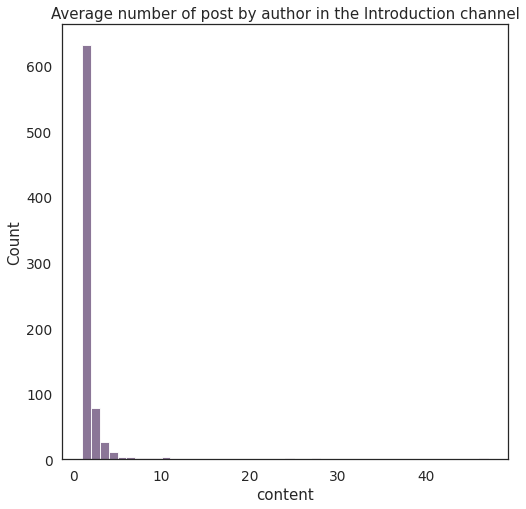

In [68]:
# See https://www.datasciencemadesimple.com/group-by-count-in-pandas-dataframe-python-2/
# See https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07
count = introduction.groupby(['author'])['content'].count().reset_index()

title = 'Average number of post by author in the Introduction channel'

plt.figure(figsize=(8,8))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.histplot(data=count, x='content', binwidth=1, color = "#654874")

plt.title(title)
plt.ioff()

In the introduction channel, a majority of user post one message as you would expect. Some users post multiple messages and up to 40. Those are likely from the admins. 

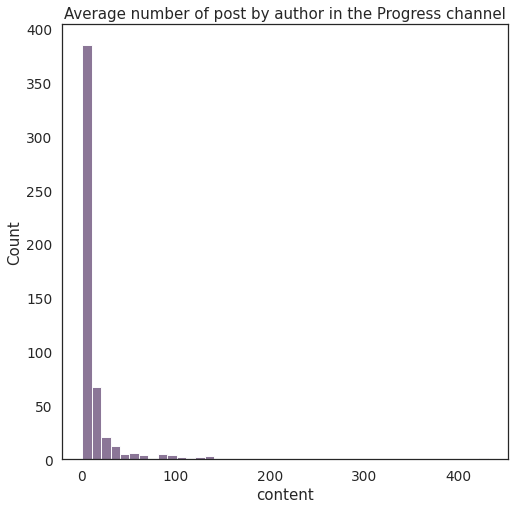

In [69]:
count = progress.groupby(['author'])['content'].count().reset_index()

title = 'Number of post by author in the Progress channel'

plt.figure(figsize=(8,8))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.histplot(data=count, x='content', binwidth=10, color = "#654874")

plt.title(title)
plt.ioff()

The histogram shows that most users have posted between 1 and 10 messages in the progress channel. One user had published more than 400 posts. After checking this corresponded to the level bot and I removed it from the analysis. 

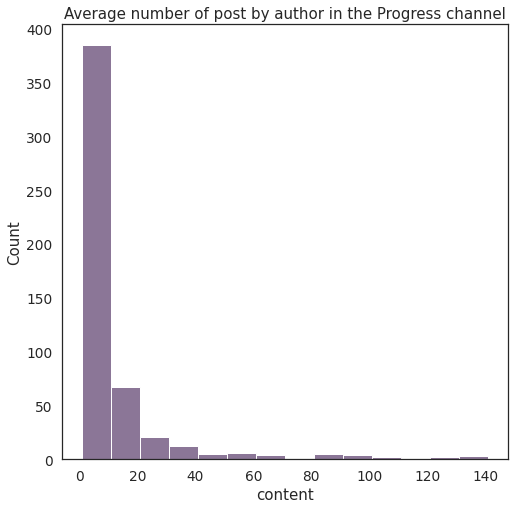

In [70]:
# Remove entries from the bot: b'vUObaU0Rsq0TCsDL1e9X0BY8oi0='

# see https://heads0rtai1s.github.io/2020/11/05/r-python-dplyr-pandas/
# see https://www.statology.org/pandas-to-string/

title = 'Number of post by author in the Progress channel'

progress['author'] = progress['author'].astype(str) # convert author so string. necessary because hashing caused an issue there. 
progress['content'] = progress['content'].astype(str)
progress = progress.loc[progress.author != "b'QEb9TFHb5gXlkxkvrvwaHZRMS/w='"]

# Print the cout to confirm bot removal from the dataset
count = progress.groupby(['author'])['content'].count().reset_index()

plt.figure(figsize=(8,8))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.histplot(data=count, x='content', binwidth=10, color = "#654874");

plt.title(title)
plt.ioff()

This updated histogram shows that most users were likely between day 1 and day 40 of the challenge. Some users appeared to have been already at day 140 of the challenge. It also possible that those users are responding to other people progress. 

# How is the number of messages evolving with time?

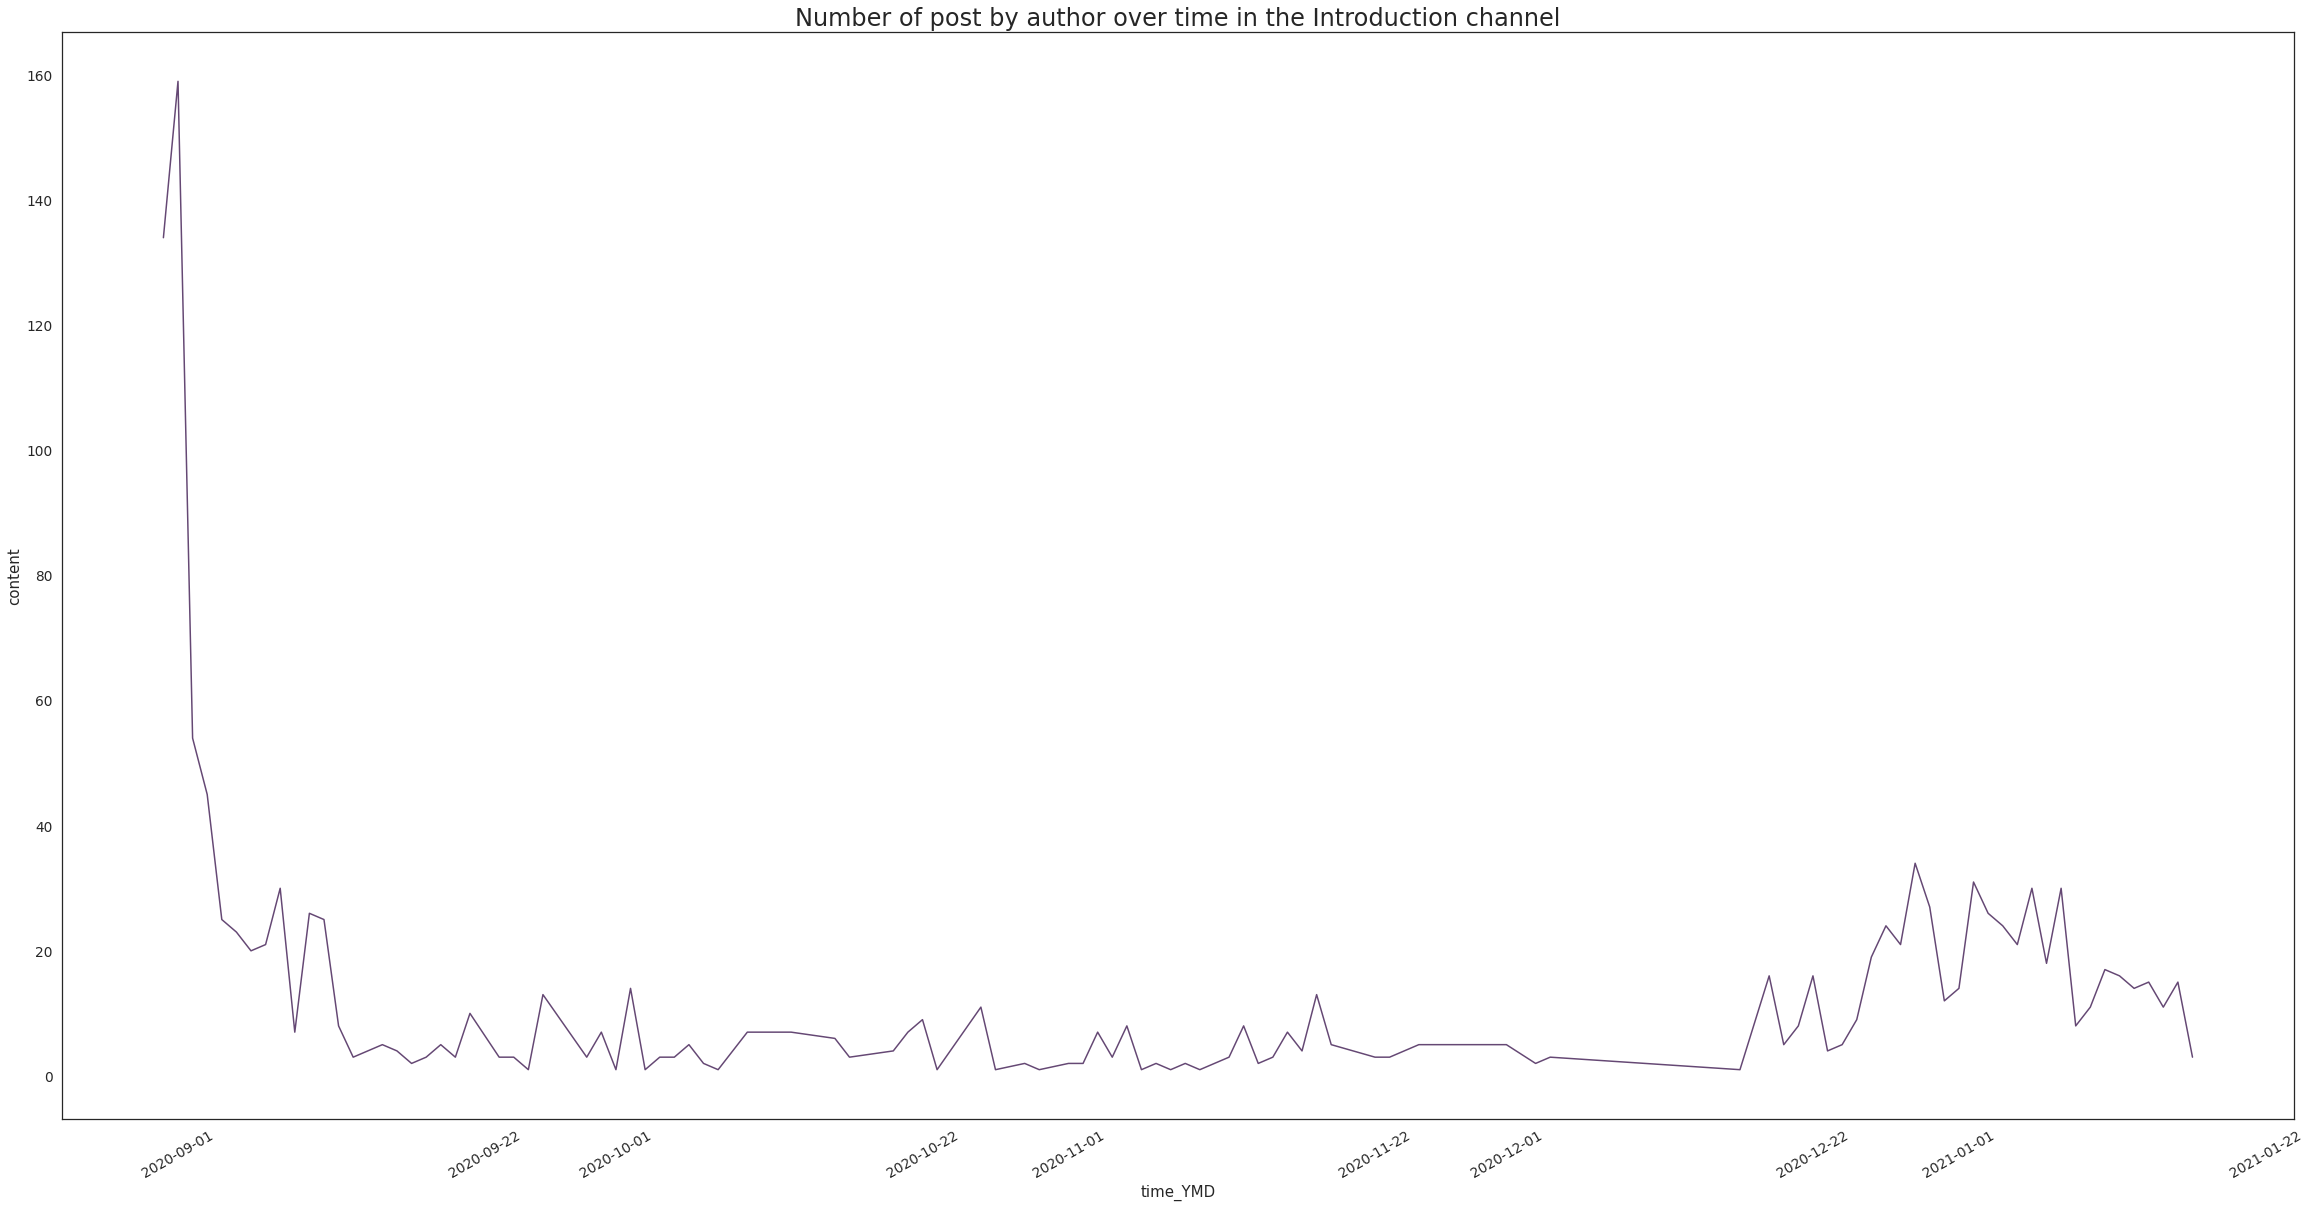

In [78]:
title = 'Number of post by author over time in the Introduction channel'

introduction['author'] = introduction['author'].astype(str) # convert author to string. necessary because hashing caused an issue there. 
introduction['content'] = introduction['content'].astype(str)

# see https://www.marsja.se/pandas-convert-column-to-datetime/
# convert column to datetime pandas
introduction['time'] = pd.to_datetime(introduction['time'])

introduction["time_YMD"] = introduction["time"].apply( lambda introduction : 
datetime.datetime(year=introduction.year, month=introduction.month, day=introduction.day))

# Count post by Days, Weeks, Months...
# See http://blog.josephmisiti.com/group-by-datetimes-in-pandas
count = introduction.groupby(['time_YMD'])['content'].count().reset_index()

# Plot the number of pots by day
# Goup the dataframe by day
# Print number of post each day
# See recent work on Google Analytic with time serie
# See recent work DSGO https://github.com/wguesdon/66DaysOfData/blob/master/DGSO/DGSO_v01_03.ipynb
# See https://stackoverflow.com/questions/56150437/how-to-plot-a-time-series-graph-using-seaborn-or-plotly
# See https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

x='time_YMD'
y='content'

plt.figure(figsize=(40,20))
sns.lineplot(x=x, y=y, data=count, color="#654874");


plt.xticks(rotation=30);
plt.title(title, fontsize = 24)
plt.ioff()

We can see here that there was a massing number of posts at the beginning of the server, followed by a sharp decline. There is a second pic that I suppose coincide with the announcement of the 66 Days round2.

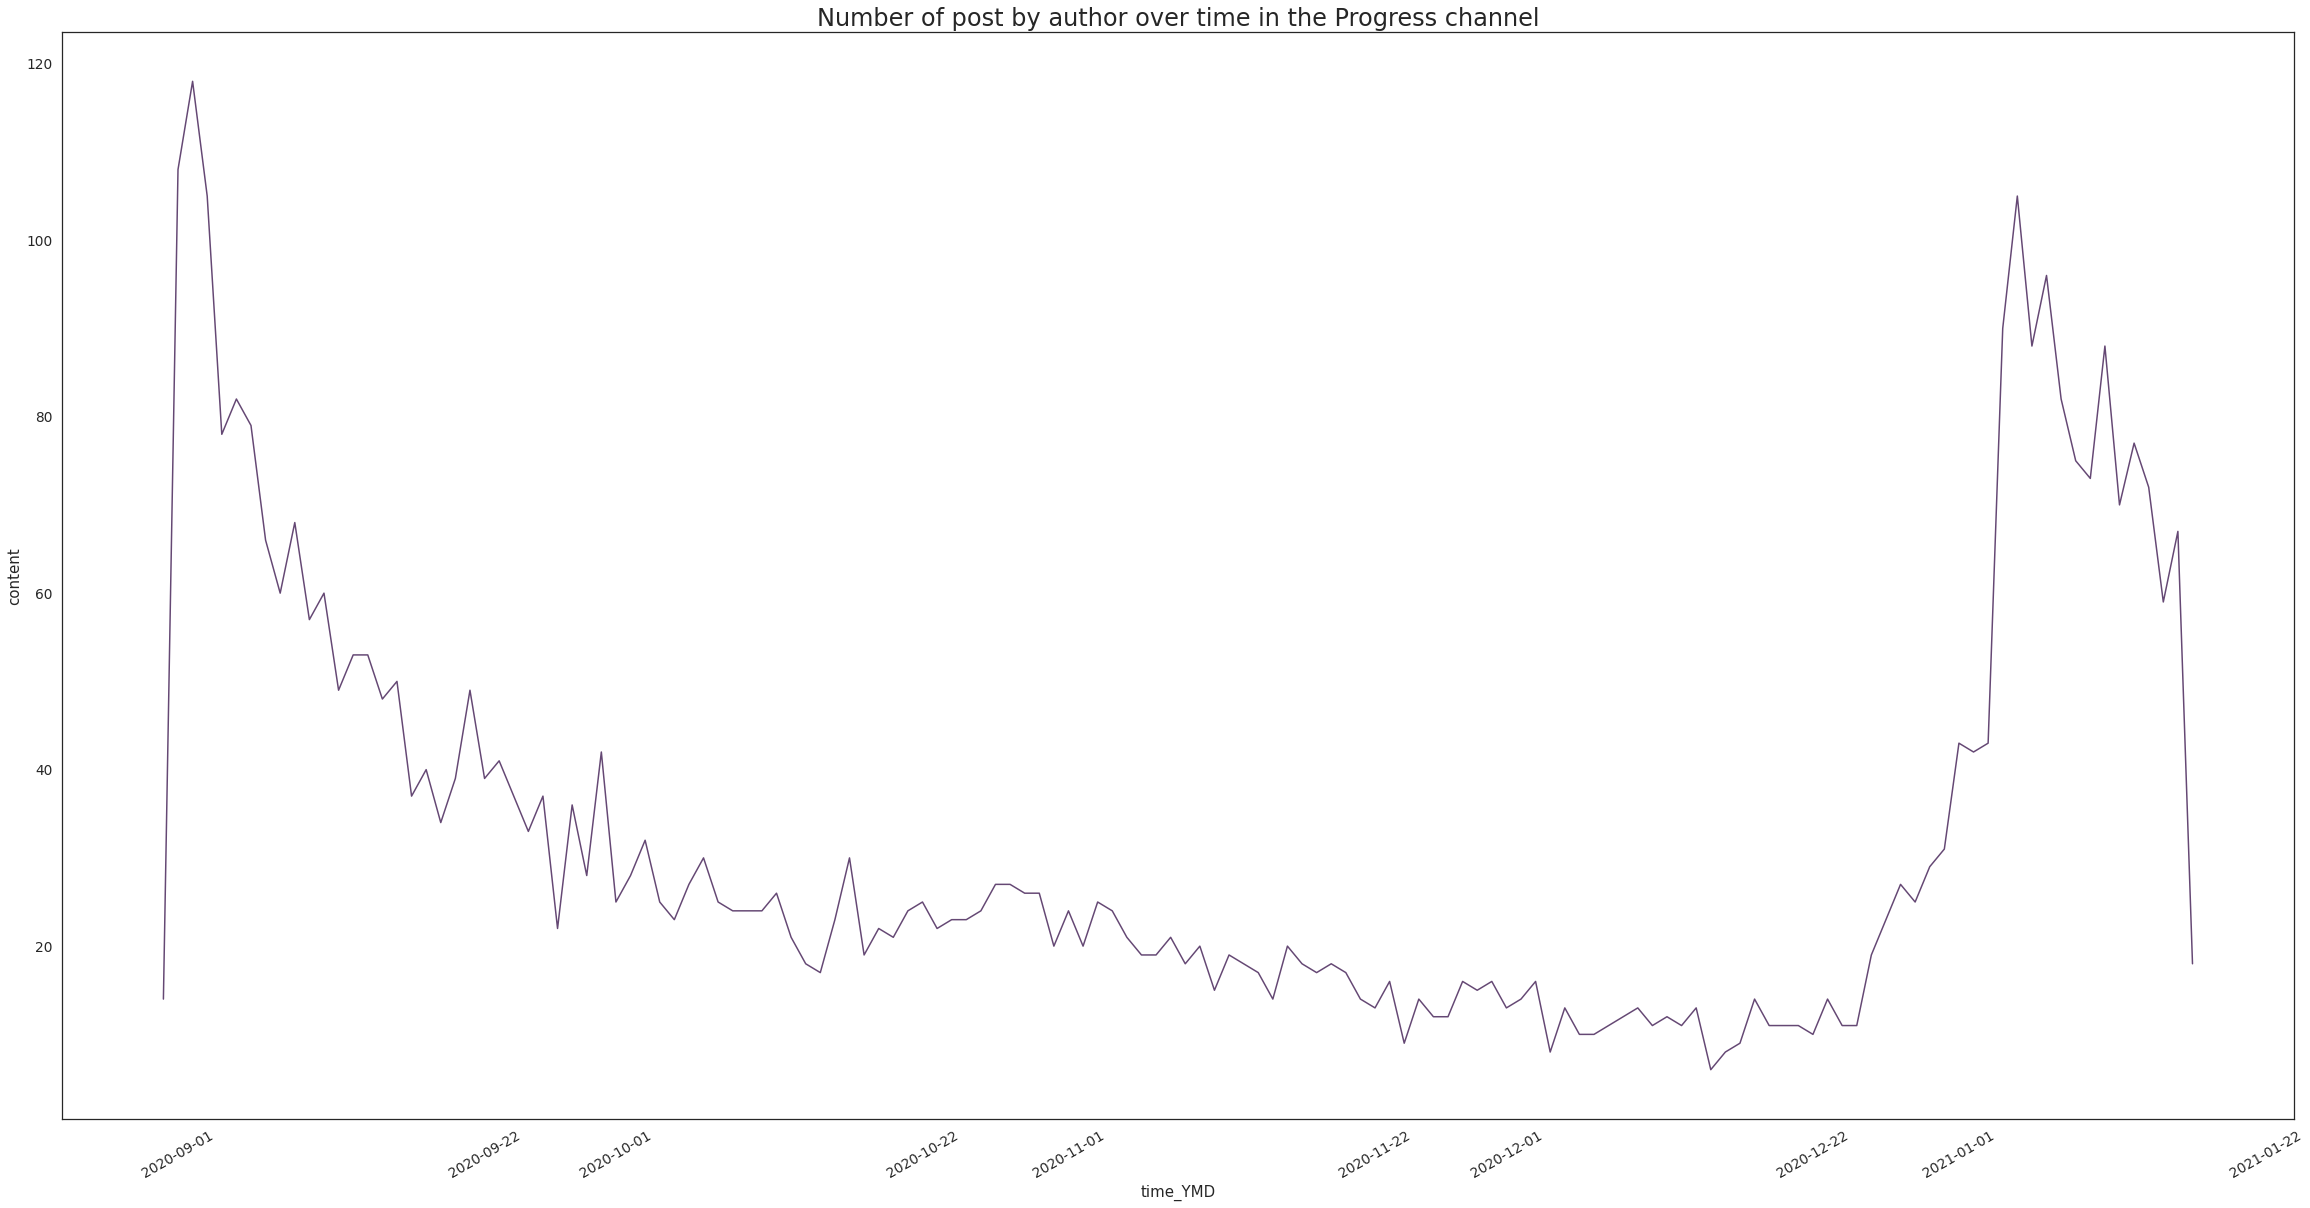

In [79]:
title = 'Number of post by author over time in the Progress channel'

progress['author'] = progress['author'].astype(str) # convert author to string. necessary because hashing caused an issue there. 
progress['content'] = progress['content'].astype(str)

# see https://www.marsja.se/pandas-convert-column-to-datetime/
# convert column to datetime pandas
progress['time'] = pd.to_datetime(progress['time'])

progress["time_YMD"] = progress["time"].apply( lambda progress : 
datetime.datetime(year=progress.year, month=progress.month, day=progress.day))

# Count post by Days, Weeks, Months...
# See http://blog.josephmisiti.com/group-by-datetimes-in-pandas
count = progress.groupby(['time_YMD'])['content'].count().reset_index()

x='time_YMD'
y='content'

plt.figure(figsize=(40,20))
sns.lineplot(x=x, y=y, data=count, color="#654874");

plt.xticks(rotation=30);
plt.title(title, fontsize = 24)
plt.ioff()

The progress distribution shows two pics. I suppose that the second pic happened after Ken started round 2 of the 66DaysofData challenge.

# What are the most common locations from users?

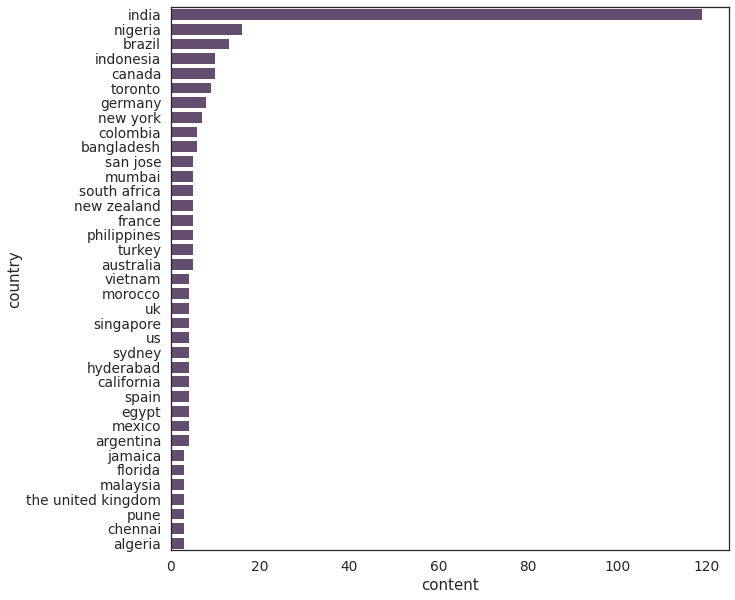

In [73]:
# Create a function to extract the first location and add to a column
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# see https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/

def add_country(x):
    doc = nlp(x)
    gpe = [] # countries, cities, states

    for ent in doc.ents:
        if (ent.label_ == 'GPE'):
            gpe.append(ent.text)
            
    if (len(gpe) >= 1):
      return (gpe[0])
    else:
      return ('none')      
 
introduction['country'] = introduction['content'].apply(add_country)

# https://datatofish.com/lowercase-pandas-dataframe/
introduction['country'] = introduction['country'].str.lower()

df = introduction.loc[introduction['country'] != "none"]

# Count post by Days, Weeks, Months...
# See http://blog.josephmisiti.com/group-by-datetimes-in-pandas
count = df.groupby(['country'])['content'].count().reset_index()
count = count.sort_values('content', ascending=False)

count = count.loc[count['country'] != "python"]
count = count.loc[count['country'] != "ds"]
count = count.loc[count['country'] != "tableau"]

count = count.loc[count['content'] > 2]
count = count.sort_values('content', ascending=False)

data = count
x="content"
y="country"

title = ''

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.barplot(x=x, y=y, data=data, color = "#654874")

plt.title(title)
plt.ioff()

At the time, the function does not differentiate between country and town. Countries can be spelt differently like UK or United Kingdom. 
From the extracted locations, India, Nigeria, Brazil, Indonesia and Canada are the most common.

# How are the days distributed in the challenge channel?

In [74]:
# from kennn in #python
# See https://docs.python.org/3/howto/regex.html
def extract_day(text):
  days = []
  text = text.lower()

  # Remove special characters
  text = re.sub('[^A-Za-z0-9]+', '', text)
  # Identify Days
  days = re.findall(r'day[\s]+[\d]+|day[\d]+', text)

  if (len(days) >= 1):
    # If day is identified extract the number
    days = re.findall(r'[\d]+', days[0])
    return (days[0])
  else:
    return ('none') 

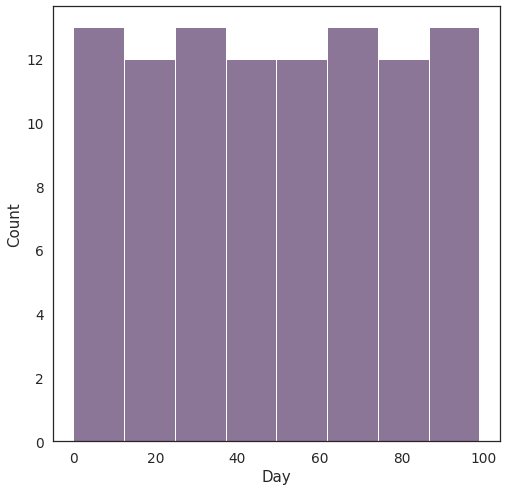

In [75]:
# Apply extract day the content column to extract the day.
# next step is to exract numbers from this column

progress['Day'] = progress['content'].apply(extract_day)
progress = progress.loc[progress['Day'] != 'none']

count = progress.groupby(['Day'])['content'].count().reset_index()
count = count.sort_values('Day', ascending=False)

# See https://stackoverflow.com/questions/53654080/remove-the-leading-zero-before-a-number-in-python
# See https://datatofish.com/string-to-integer-dataframe/

count['Day'] = count['Day'].astype(str)
count = count.loc[count['Day'] != 'none']
count['Day'] = count['Day'].astype(int)

# At the time the data. was collected noone could have done more than 3 months of the challenge
count = count.loc[(count['content'] > 1) & (count['Day'] < 100)]

# see https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
# Add a count group.by step
count = count.groupby(by=["Day"], dropna=False).count().reset_index()

data = count
y="content"
x="Day"

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.histplot(data=data, x=x, color = "#654874")

plt.title(title)
plt.ioff()

The distributions of the different days in the progress channel seem equally distributed. This seems to indicate that there is no drop off during the challenge. 

# References

* [How to Gather Message Data Using a Discord Bot From Scratch With Python](https://levelup.gitconnected.com/how-to-gather-message-data-using-a-discord-bot-from-scratch-with-python-2fe239da3bcd)